In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [159]:
df_2019 = pd.read_csv('2019_обработанный_2.csv', sep=',', encoding='cp1251')
df_2020_new = pd.read_csv('2020_new_обработанный_2.csv', sep=',', encoding='cp1251')
df_2020_old = pd.read_csv('2020_old_обработанный_2.csv', sep=',', encoding='cp1251')




df_2020 = pd.concat([df_2020_new, df_2020_old],ignore_index=True)

df_2021 = pd.read_csv('2021_обработанный_2.csv', sep=',', encoding='cp1251')


In [160]:
df_2019['Месяц']=''
df_2019['Год']=''

df_2020['Месяц']=''
df_2020['Год']=''



df_2021['Месяц']=''
df_2021['Год']=''

for i in range(len(df_2019['Направление расходов'])):
    data_list=df_2019['Дата проведения'][i].split('.')
    df_2019['Месяц'][i]  = data_list[1]
    df_2019['Год'][i]  = data_list[2]
    
for i in range(len(df_2020['Направление расходов'])):
    data_list=df_2020['Дата проведения'][i].split('.')
    df_2020['Месяц'][i]  = data_list[1]
    df_2020['Год'][i]  = data_list[2]   

for i in range(len(df_2021['Направление расходов'])):
    data_list=df_2021['Дата проведения'][i].split('.')
    df_2021['Месяц'][i]  = data_list[1]
    df_2021['Год'][i]  = data_list[2]  
    

<ipython-input-160-9c977183c21e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Месяц'][i]  = data_list[1]
<ipython-input-160-9c977183c21e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019['Год'][i]  = data_list[2]
<ipython-input-160-9c977183c21e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Месяц'][i]  = data_list[1]
<ipython-input-160-9c977183c21e>:20: SettingWithCopyWarning: 
A value is trying to b

In [161]:
types_of_spending = list(df_2019['Наименование вида расходов'].unique())

list_of_buildings_2019 = list(df_2019['Направление расходов'].unique())
list_of_buildings_2020 = list(df_2020_old['Направление расходов'].unique())
list_of_buildings_2020 +=list(df_2020_new['Направление расходов'].unique())
list_of_buildings_2020 = list(set(list_of_buildings_2020))
list_of_buildings_2021 = list(df_2021['Направление расходов'].unique())

all_buildings=list(set(list_of_buildings_2019) & set(list_of_buildings_2020) & set(list_of_buildings_2021))

In [162]:


electricity_data = pd.DataFrame()
electricity_data['Объект']=''




for year in [2019,2020,2021]:
    for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        electricity_data[month+'_'+str(year)]=''     

            
x=[]           
for i in range(len(electricity_data.columns)):
    x.append('0')
            

for i in range(len(all_buildings)):        
    electricity_data.loc[i] = x



In [166]:
# 2019
for (i,building) in enumerate(all_buildings):
    for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        data = df_2019[(df_2019['Направление расходов'] == building) 
            & (df_2019['Наименование вида расходов'] == 'ЭЭ')
            & (df_2019['Месяц'] == month)
           ]
        electricity_data[month+'_'+str(2019)][i]= sum(data['Конечный остаток'])
        electricity_data['Объект'][i]=building
# 2020
for (i,building) in enumerate(all_buildings):
    for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        data = df_2020[(df_2020['Направление расходов'] == building) 
            & (df_2020['Наименование вида расходов'] == 'ЭЭ')
            & (df_2020['Месяц'] == month)
           ]
        electricity_data[month+'_'+str(2020)][i]= sum(data['Конечный остаток'])
        electricity_data['Объект'][i]=building
        
# 2021
for (i,building) in enumerate(all_buildings):
    for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        data = df_2021[(df_2021['Направление расходов'] == building) 
            & (df_2021['Наименование вида расходов'] == 'ЭЭ')
            & (df_2021['Месяц'] == month)
           ]
        electricity_data[month+'_'+str(2021)][i]= sum(data['Конечный остаток'])
        electricity_data['Объект'][i]=building        
        
        


In [197]:
a=np.array(electricity_data[electricity_data['Объект'] == 'Ленинская, 22'].values)

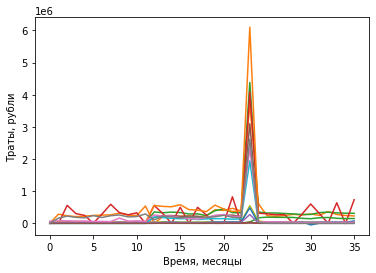

In [212]:
for i in all_buildings:
    a=np.array(electricity_data[electricity_data['Объект'] == i].values)
    plt.plot(list(a[0][1:]))
    plt.xlabel('Время, месяцы')
    plt.ylabel('Траты, рубли')

In [210]:
# Явно видна аномалия высоких трат. Причина не ясна.

In [232]:
electricity_data

,Объект,01_2019,02_2019,03_2019,04_2019,05_2019,06_2019,07_2019,08_2019,09_2019,...,03_2021,04_2021,05_2021,06_2021,07_2021,08_2021,09_2021,10_2021,11_2021,12_2021
0,"Фонтанная, 19",0,0,0,0,0,0,0,0,0,...,1310.89,1895.68,1454.78,54390.3,-50363.1,2307.52,2833.97,3107.35,2565.78,2405.83
1,"Ленинская, 22",0,284122,233824,208477,222031,243517,255160,263272,315130,...,216937,240654,278731,257755,290460,246190,366029,273720,242507,228723
2,"Океанский пр-т, 34",0,0,0,0,0,0,0,0,0,...,319857,305681,291477,275392,275569,332929,346305,324196,314331,310668
3,"Пушкина, 4",0,0,557488,302059,245928,0,286595,590686,332431,...,264429,269461,0,284662,600759,305877,-610.34,638342,-9143.4,733543
4,"Светланская, 73 А",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"М-Амурского, 42",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,"Светланская, 69",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Дежнева 7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Билибино,0,46604.2,47522.9,44766.7,40173.1,42762.2,40089.6,44289,42066,...,36193.5,37894.5,32602.5,34965,38745,35914.5,37984.5,39226.5,38295,39847.5
9,"Некрасова, 102",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
electricity_data2=electricity_data[(electricity_data['Объект']!='Светланская, 73 А') & (electricity_data['Объект']!='М-Амурского, 42') & (electricity_data['Объект']!='Светланская, 69')]






In [244]:
model1 = LGBMRegressor()
model2 = LinearRegression()
scaler = StandardScaler()

# Выделяем обучающий и валидационный набор 
train, valid = train_test_split(electricity_data2.drop(['Объект'], axis=1), shuffle=False)

# Выделяем признаки и цель
X_train = train.drop(['12_2021'], axis=1)
X_train = scaler.fit_transform(X_train)



y_train = train['12_2021']
X_test = valid.drop(['12_2021'], axis=1)
X_test = scaler.transform(X_test)


y_test = valid['12_2021']

model2.fit(X_train,y_train)
pred=model2.predict(X_test)

mean_absolute_percentage_error(pred,y_test)


0.8811193998097779

In [ ]:
'Светланская, 73 А'
'М-Амурского, 42'
'Светланская, 69'